<a href="https://colab.research.google.com/github/gbessardon/Create_plots/blob/main/Dublin_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses the LCZ dataset that I have placed in my drive you can just link it to yours to get the same file name
https://drive.google.com/drive/folders/11x64yGuQJvDvDGogMgZXobagsZmjhCmr?usp=sharing

It also uses ECOCLIMAP-SG that I have downloaded here:
https://drive.google.com/drive/folders/1WEjwH631sfyPflG5ybXzIIT64Cg3kxxS?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
#from mpl_toolkits.basemap import Basemap
from osgeo import gdal
import xarray as xr
import rasterio
from affine import Affine
import zipfile
import os

# Create Colormap ECOCLIMAP and legend



In [ ]:
def cover_fraction(filename):
    data=open(filename)
    covernum=[]
    covername=[]
    cityfrac=[]
    vegfrac=[]
    inwaterfrac=[]
    seafrac=[]
    for i,d in enumerate(data):
        if i==0:
            fieldnames=d.split(',')
            covername.append('no data')
            cityfrac.append(0.0)
            vegfrac.append(0.0)
            inwaterfrac.append(0.0)
            seafrac.append(0.0)
        else:
#            print(d.split(','))
            covernum.append(int(d.split(',')[0]))
            covername.append(d.split(',')[1])
            cityfrac.append(float(d.split(',')[2]))
            vegfrac.append(float(d.split(',')[3]))
            inwaterfrac.append(float(d.split(',')[4]))
            seafrac.append(float(d.split(',')[5]))
    return(fieldnames,np.array(covernum),covername,np.array(cityfrac),np.array(vegfrac),
           np.array(inwaterfrac),np.array(seafrac))

In [ ]:
covernamef='/content/drive/MyDrive/ECOCLIMAP_SG/ECOCLIMAP_SG_cover_data.csv'
(fieldnames,covernum,covername,cityfrac,vegfrac,inwaterfrac,seafrac)=cover_fraction(covernamef)
c0=(0/255.0,0/255.0,0/255.0,255/255.0)## 0 value
c1=(0/255.0,0/255.0,128/255.0,255/255.0)##navy blue 1.sea    
c2=(0/255.0,0/255.0,205/255.0,255/255.0)## mediumblue 2.inland waters
c3=(0/255.0, 0/255.0, 255/255.0, 255/255.0) ##Blue 3.rivers
c4=(211/255.0,211/255.0,211/255.0,255/255.0)## lightgray 4.Bare land
c5=(169/255.0,169/255.0,169/255.0,255/255.0)## darkgray 5.Rocks
c6=(255/255.0,250/255.0,250/255.0,255/255.0) ## Snow 6.permanent snow
c7=(240/255.0,255/255.0,240/255.0,255/255.0)## Honeydew 7.boreal broadleaf deciduous
c8=(85/255.0,107/255.0,47/255.0,255/255.0)## darkolivegreen 8.temperate broadleaf deciduous
c9=(154/255.0,205/255.0,50/255.0,255/255.0)## yellowgreen 9.tropical broadleaf deciduous
c10=(0/255.0,128/255.0,0/255.0,255/255.0)## green 10.temperate broadleaf evergreen
c11=(255/255.0,127/255.0,80/255.0,255/255.0)## coral 11. tropical broadleaf evergreen
c12=(160/255.0,82/255.0,45/255.0,255/255.0)## siena 12. boreal needleaf evergreen
c13=(34/255.0,139/255.0,34/255.0,255/255.0)## forest green 13.temperate needleleaf evergreen
c14= (188/255.0,143/255.0,143/255.0,255/255.0)## rosybrown 14. boreal needleleaf deciduous
c15=(205/255.0,133/255.0,63/255.0,255/255.0)## peru 15. shrubs
c16=(222/255.0,184/255.0,135/255.0,255/255.0)##  burlywood 16. boreal grassland
c17=(50/255.0,205/255.0,50/255.0,255/255.0)##limegreen 17 . temperate grassland
c18=(255/255.0,215/255.0,0/255.0,255/255.0) ##gold 18. tropical grassland
c19=(32/255.0,178/255.0,170/255.0,255/255.0)##lightseagreen 19.winter crop
c20=(173/255.0,255/255.0,47/255.0,255/255.0)##green yellow 20.summer crop
c21=(189/255.0,183/255.0,107/255.0,255/255.0)##darkkhaki 21. C4 crops
c22=(102/255.0,102/255.0,0/255.0,255/255.0)## Dark yellow3 22.flooded trees
c23=(46/255.0,139/255.0,87/255.0,255/255.0)## seagreen 23.flooded grassland
c24=(138/255.0,2/255.0,0/255.0,255/255.0)## 24. red LCZ1
c25=(206/255.0,0/255.0,0/255.0,255/255.0)## 25. red LCZ2
c26=(252/255.0,1/255.0,1/255.0,255/255.0)## 26. red LCZ3
c27=(255/255.0,90/255.0,0/255.0,255/255.0)## 27. red LCZ4
c28=(255/255.0,120/255.0,0/255.0,255/255.0)## 28. red LCZ5
c29=(255/255.0,150/255.0,0/255.0,255/255.0)## 29. red LCZ6
c30=(255/255.0,180/255.0,0/255.0,255/255.0)## 30. red LCZ7
c31=(255/255.0,210/255.0,0/255.0,255/255.0)## 31.red LCZ8
c32=(255/255.0,240/255.0,0/255.0,255/255.0)## 32. red LCZ9
c33=(128/255.0,128/255.0,128/255.0,255/255.0)## 33. gray LCZ10
scheme=[c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33]
colSG = ListedColormap(scheme)

#Get ECOCLIMAP data



In [ ]:
# Reads ecoclimap SG data and extracts the data between the max/min latitude and max/min longitude
def get_dataSG(fname,latmax,latmin,lonmax,lonmin):

    gdal.UseExceptions()
    dinputf = gdal.Open(fname)
    output='tempSG.tif'    
    gdal.Translate(output,dinputf,projWin=[lonmin,latmax,lonmax,latmin])
    ds=gdal.Open(output)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #
    #
    #
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)


    #Chunck the data to save RAM for plotting
    #Ydecreasing
    #b=np.min(np.where(Y<latmin)[0])
    #a=np.max(np.where(Y>latmax)[0])

    #c=np.max(np.where(X<lonmin)[0])
    #d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y
    LON=X
    D=data

    return (LAT,LON,D)

In [ ]:
def get_LCZ(fname, lonmin, latmax, lonmax, latmin):
    gdal.UseExceptions()
    dinputf = gdal.Open(fname)
    res = dinputf.GetGeoTransform()[1]
    output='temp.tif'
    gdal.Translate(output,dinputf,projWin=[lonmin, latmax, lonmax, latmin])
    gdal.UseExceptions()
    ds = gdal.Open(output)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
    #    else:
    #        xmax = gt[0] + (xres * ds.RasterXSize) 
    #        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)
    D=data
    D[data==0]=17 #set no data as water
    return (X,Y,D)

In [ ]:
lcznv=(255/255.0,255/255.0,255/255.0,255/255.0)## 0 value
lcz1=(138/255.0,2/255.0,0/255.0,255/255.0)## 24. red LCZ1
lcz2=(206/255.0,0/255.0,0/255.0,255/255.0)## 25. red LCZ2
lcz3=(252/255.0,1/255.0,1/255.0,255/255.0)## 26. red LCZ3
lcz4=(255/255.0,90/255.0,0/255.0,255/255.0)## 27. red LCZ4
lcz5=(255/255.0,120/255.0,0/255.0,255/255.0)## 28. red LCZ5
lcz6=(255/255.0,150/255.0,0/255.0,255/255.0)## 29. red LCZ6
lcz7=(255/255.0,180/255.0,0/255.0,255/255.0)## 30. red LCZ7
lcz8=(255/255.0,210/255.0,0/255.0,255/255.0)## 31.red LCZ8
lcz9=(255/255.0,240/255.0,0/255.0,255/255.0)## 32. red LCZ9
lcz10=(128/255.0,128/255.0,128/255.0,255/255.0)## 33. gray LCZ10
lczA=(34/255.0,139/255.0,34/255.0,255/255.0)## dense Tree
lczB=(0/255.0,171/255.0,1/255.0,255/255.0)
lczC=(99/255.0,132/255.0, 37/255.0,255/255.0)
lczD=(186/255.0,219/255.0,120/255.0,255/255.0)
lczE=(0.0/255.0,0.0/255.0,0.0/255.0,255/255.0)
lczF=(250/255.0,248/255.0,175/255.0,255/255.0)
lczG=(105/255.0,107/255.0,250/255.0,255/255.0)
schemeLCZ=[lcznv,lcz1,lcz2,lcz3,lcz4,lcz5,lcz6,lcz7,lcz8,lcz9,lcz10,lczA,lczB,lczC,lczD,lczE,lczF,lczG]
colLCZ = ListedColormap(schemeLCZ)

In [ ]:
covernameLCZ=['no data',
              'LCZ1: compact high-rise',
              'LCZ2: compact midrise',
              'LCZ3: compact low-rise',
              'LCZ4: open high-rise',
              'LCZ5: open midrise',
              'LCZ6: open low-rise',
              'LCZ7: lightweight low-rise',
              'LCZ8: large low-rise',
              'LCZ9: sparsely built',
              'LCZ10: heavy industry',
              'LCZA: desnse trees',
              'LCZB: scattered trees',
              'LCZC: bush scrub',
              'LCZD: low plants',
              'LCZE: Bare rock or paved',
              'LCZF: Bare soil or sand',
              'LCZG: Water'
              ]

In [ ]:
latmax=53.7
latmin=53
lonmax=-6
lonmin=-6.55
fname='/content/drive/MyDrive/EU_LCZ/EU_LCZ_map_epsg4326.tif'
(X,Y,D)=get_LCZ(fname, lonmin, latmax, lonmax, latmin)

In [ ]:
np.unique(D)

array([ 2,  3,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17], dtype=int16)

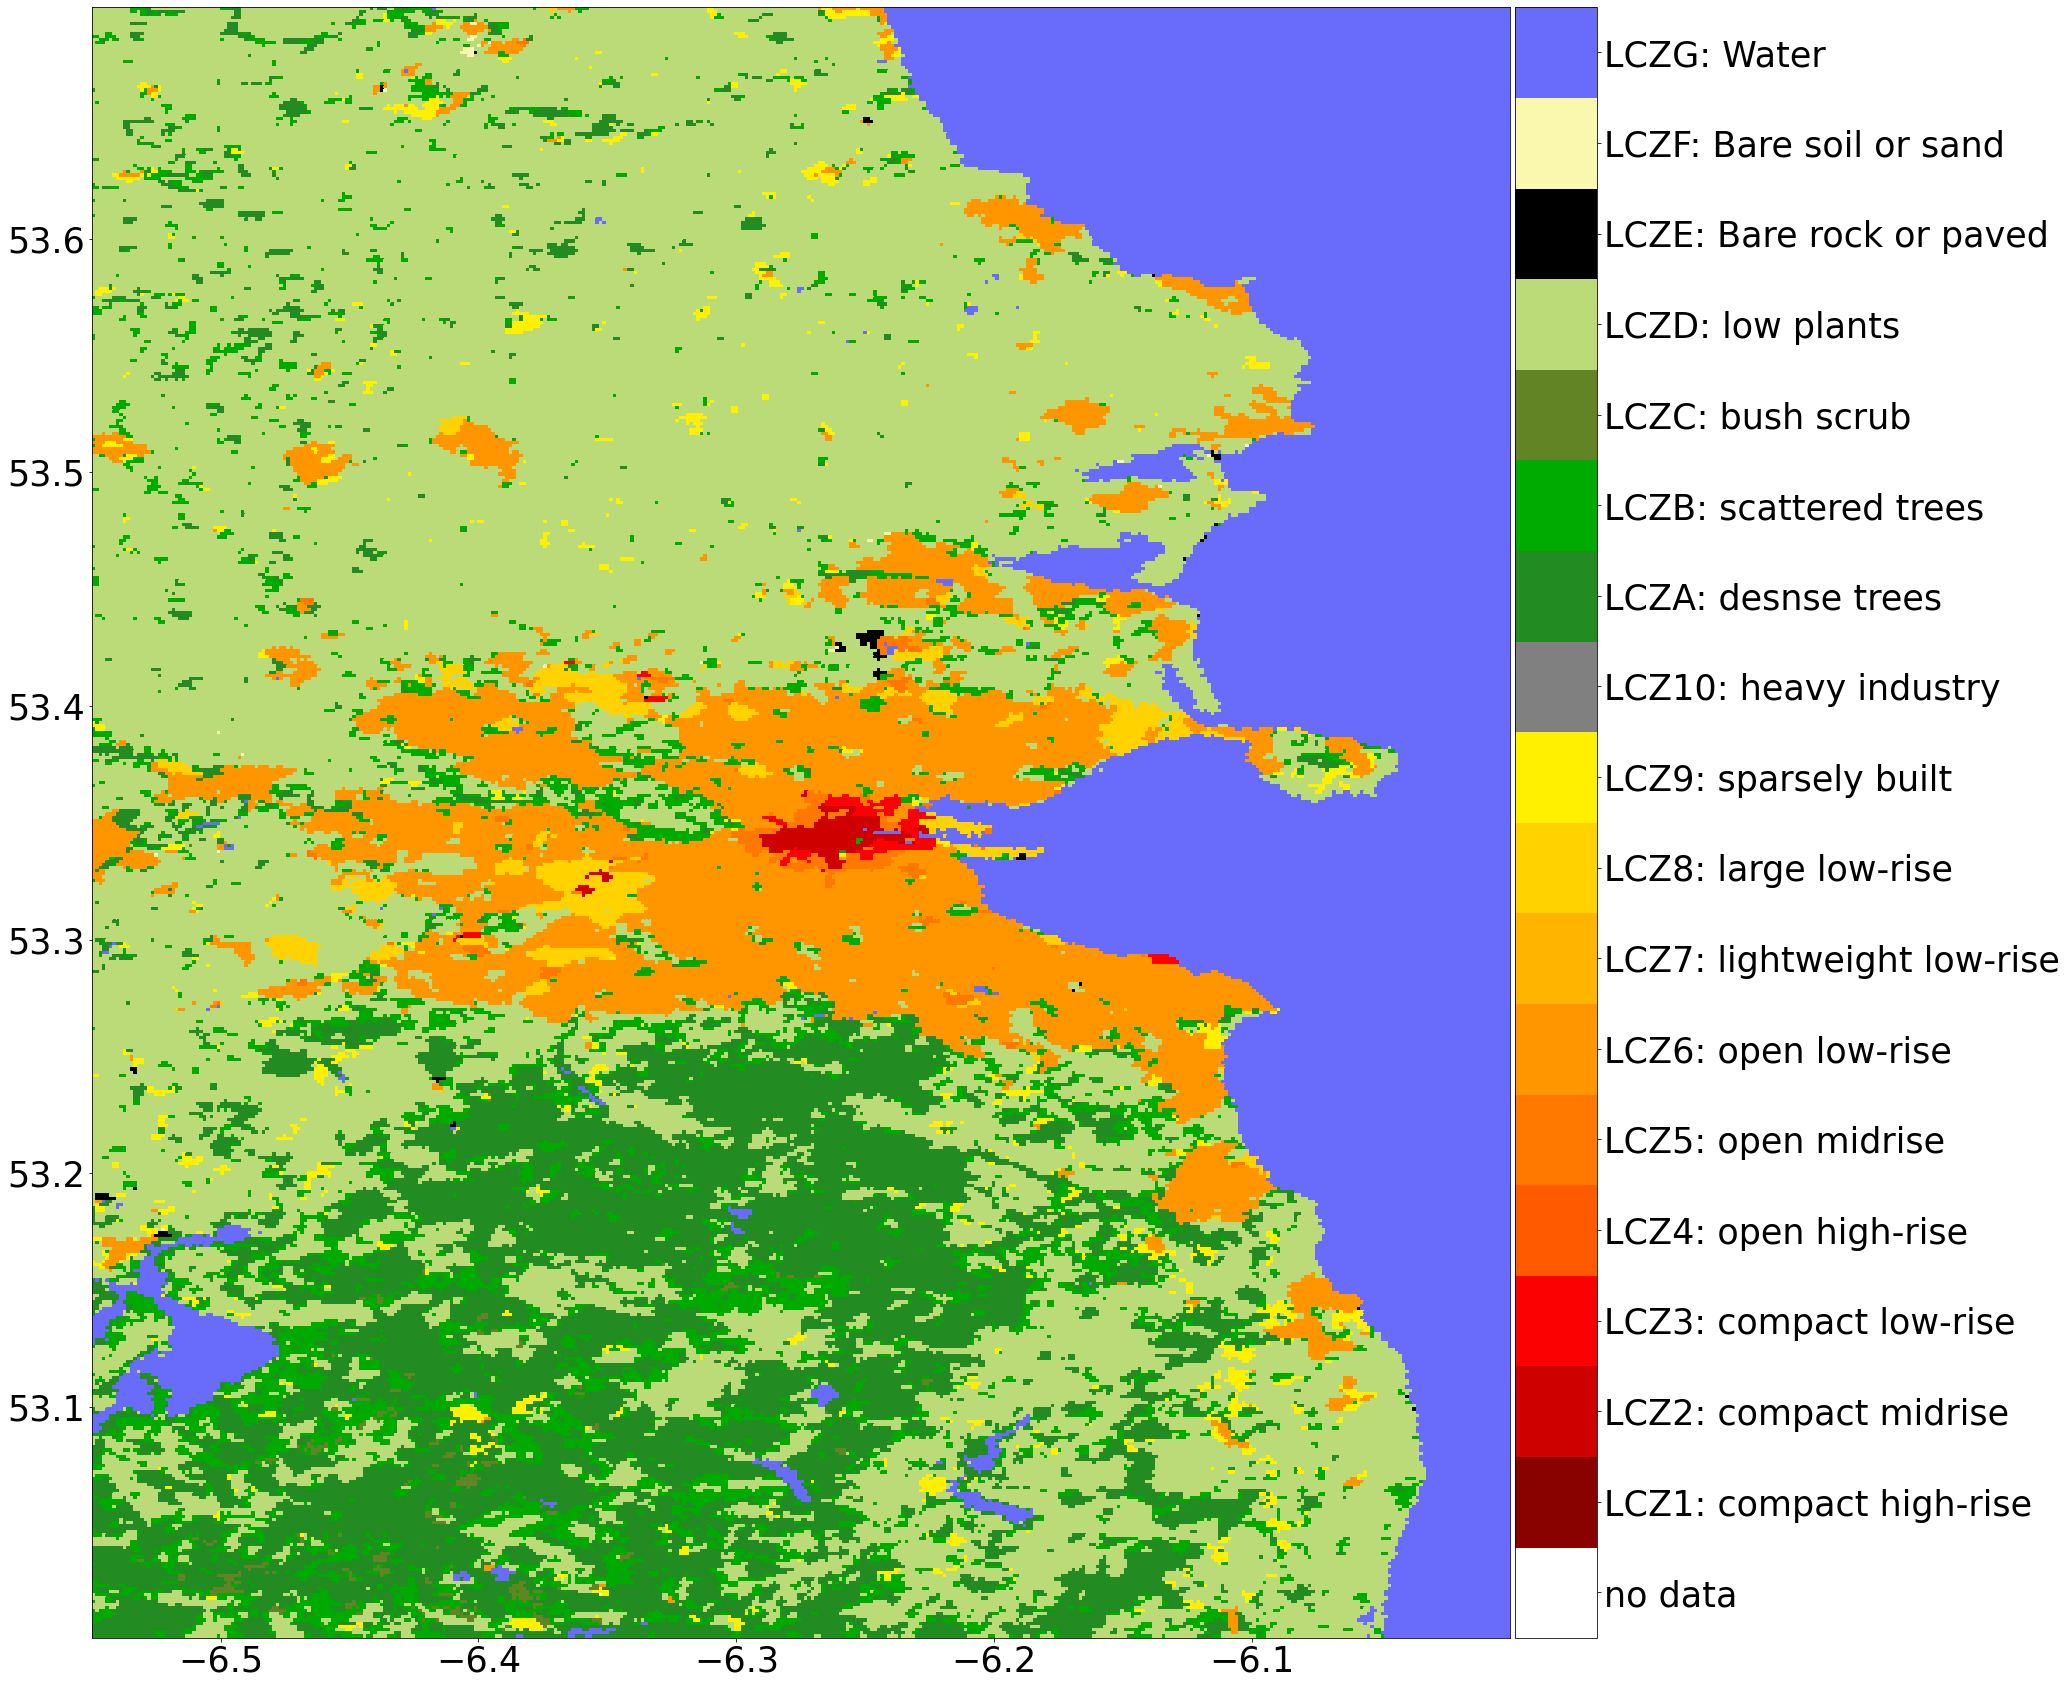

In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(30, 30))
ax1=axs
LONg, LATg = np.meshgrid(X,Y)
c=ax1.pcolormesh(X,Y,D,cmap=colLCZ,vmin=0,vmax=len(covernameLCZ))
cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covernameLCZ)),extendfrac='auto', spacing='proportional',pad=0.003)   
cb.set_ticklabels(covernameLCZ)
cb.ax.tick_params(labelsize=35)
ax1.tick_params(labelsize=35)
fig.savefig('Dublinwudb.png',format='png',quality=95,bbox_inches='tight')

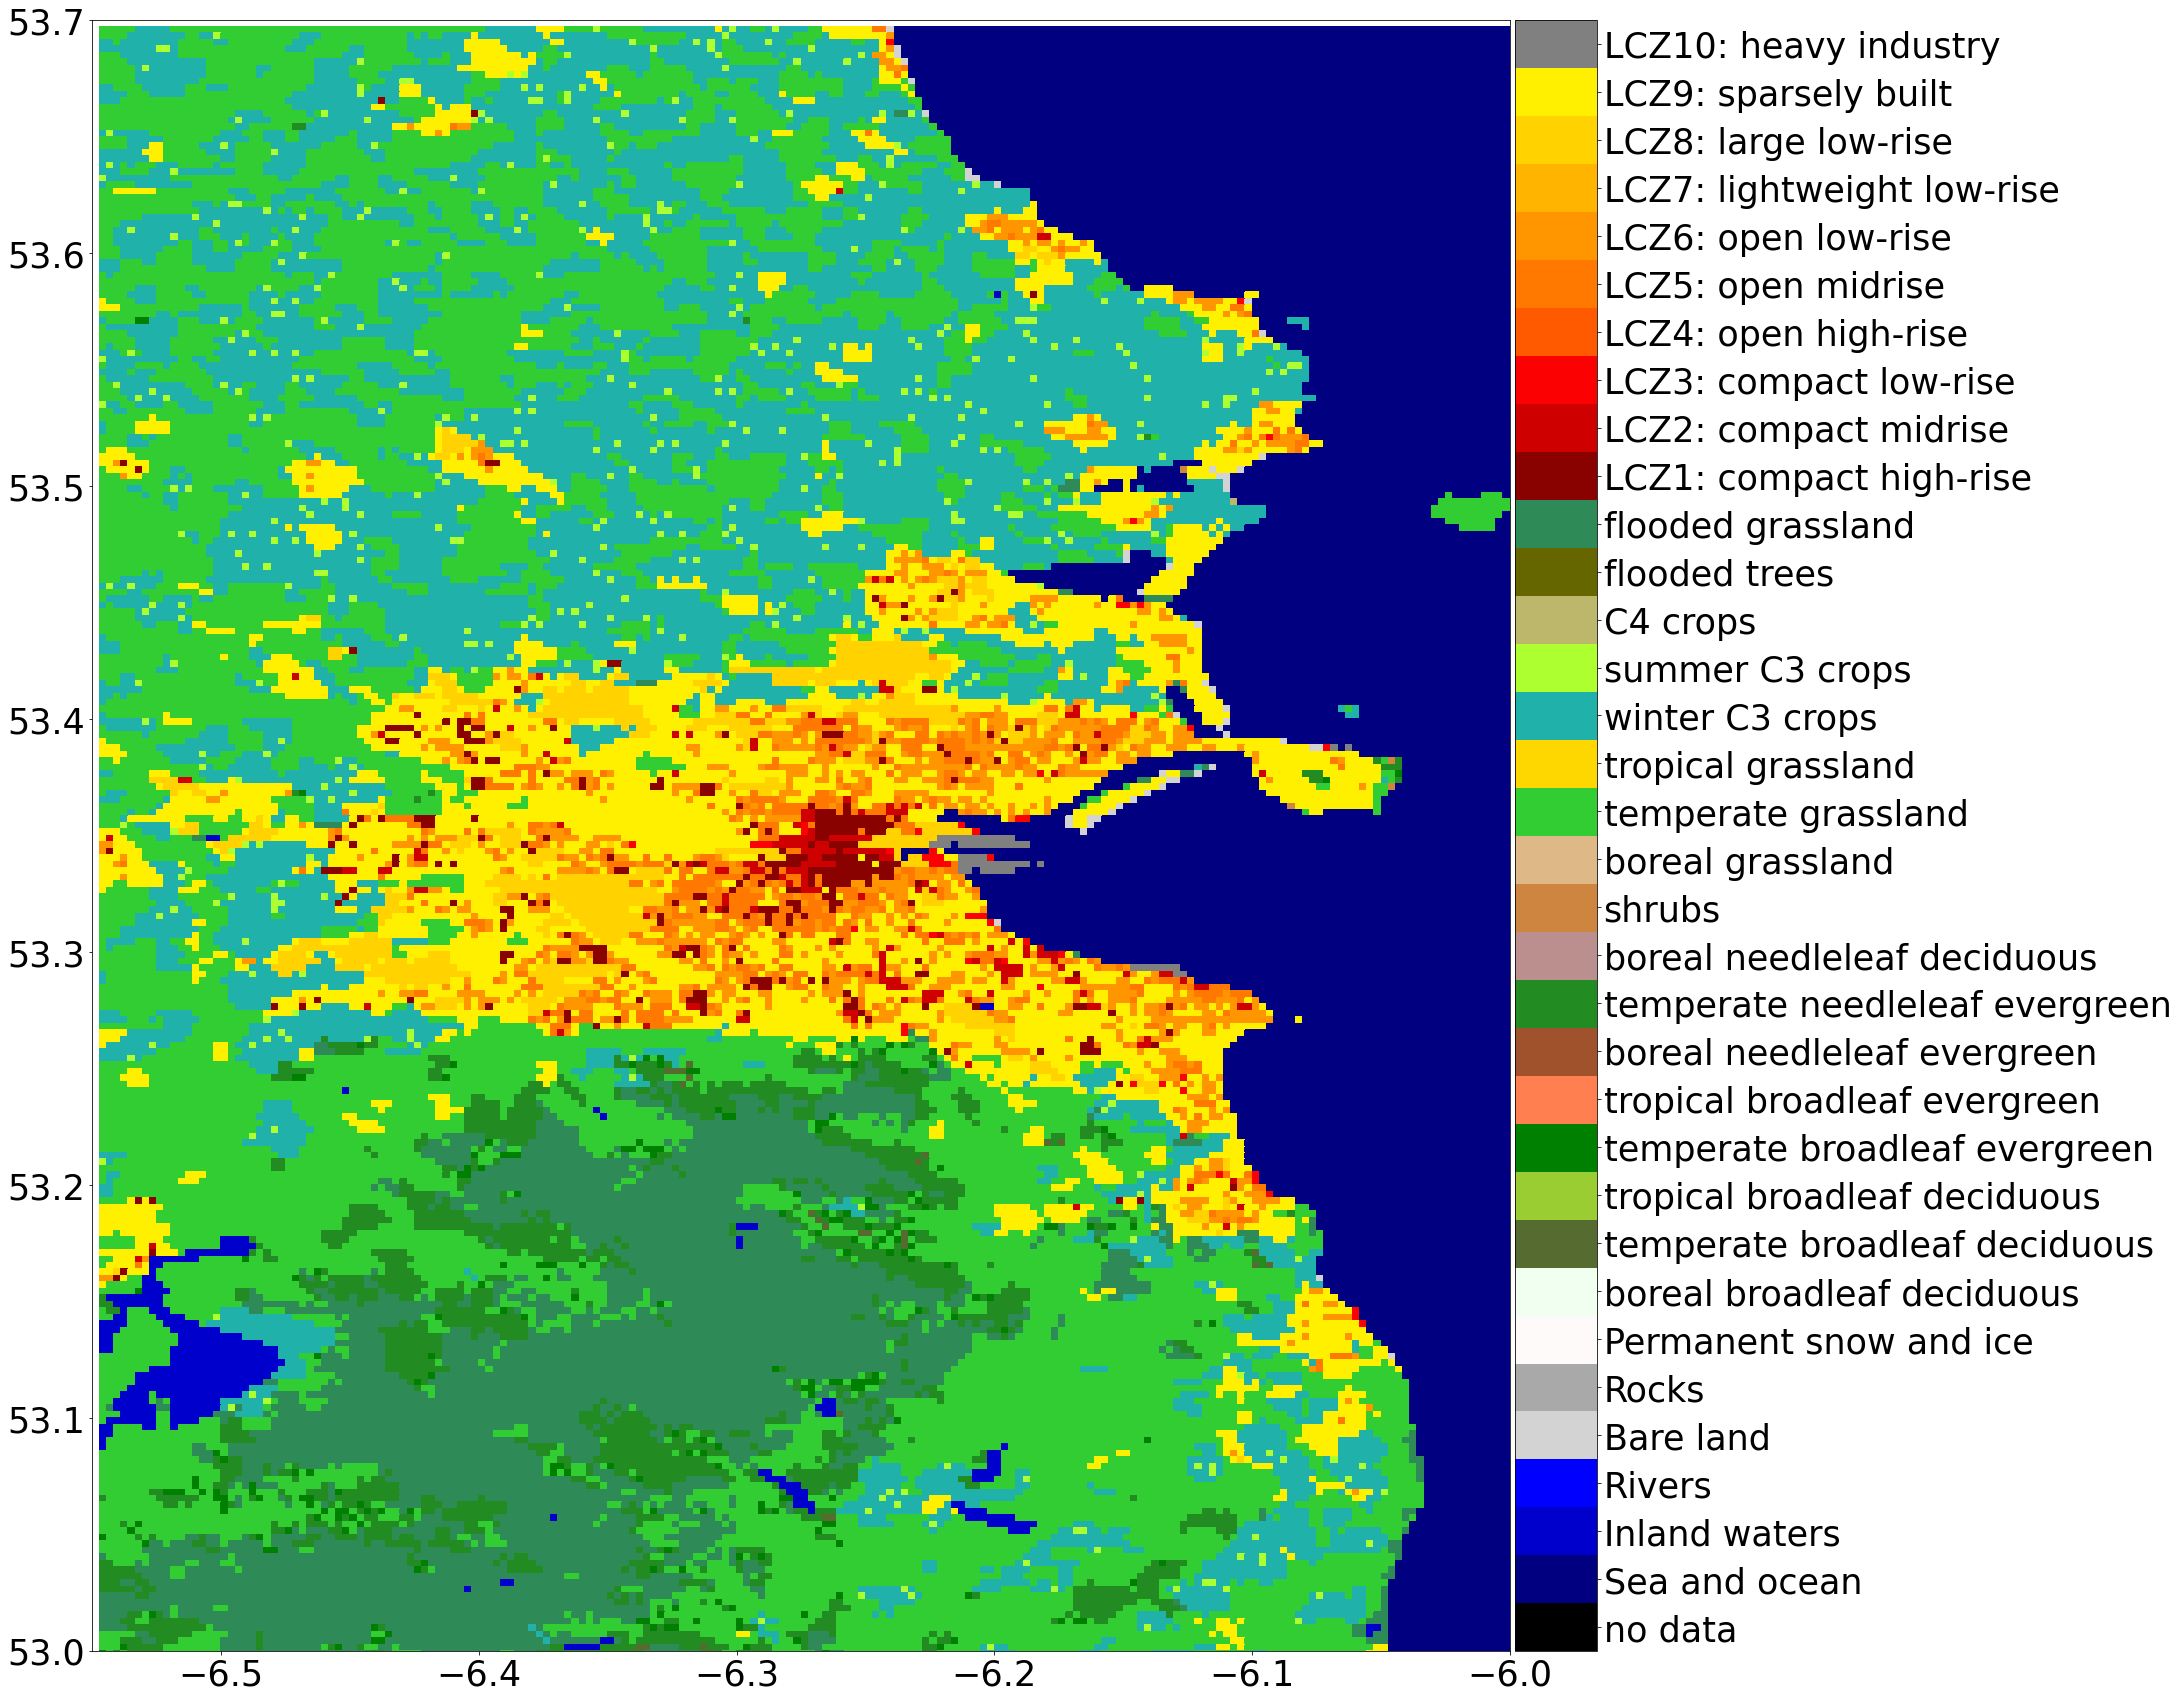

In [ ]:
#latmax=np.max(Y)
#latmin=np.min(Y)
#lonmax=np.max(X)
#lonmin=np.min(X)
fnameSG='/content/drive/MyDrive/ECOCLIMAP_SG/ecosg_final_map.dir'
(LATSG,LONSG,DSG)=get_dataSG(fnameSG,latmax,latmin,lonmax,lonmin)
fig, axs = plt.subplots(1, 1,figsize=(30, 30))
ax1=axs

LONg, LATg = np.meshgrid(LONSG,LATSG)
c=ax1.pcolormesh(LONSG,LATSG,DSG,cmap=colSG, vmin=0,vmax=len(covername))
ax1.set_xlim(lonmin,lonmax)
ax1.set_ylim(latmin,latmax)
#ax1.text(-7.315552,54.047338, 'Ballyhaise',fontsize=35)
#ax1.text(-7.377130,54.045211, 'Butlers Bridge',fontsize=35)
#ax1.text(-7.361557,53.989339, 'Cavan',fontsize=35)
cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covername)),extendfrac='auto', spacing='proportional',pad=0.003)   
cb.set_ticklabels(covername)
cb.ax.tick_params(labelsize=35)
ax1.tick_params(labelsize=35)
fig.savefig('Dublinecosg.png',format='png',quality=95,bbox_inches='tight')